### Linear Regression and Gradient Descent

I followed [Andrew Ng's CS229 Video Lecture 2](https://www.youtube.com/watch?v=4b4MUYve_U8) for this section. Hands down one of the best and comprensive lectures on this subject with a fantastic teacher. 

### My Notes

Linear Regression is one of the most common statistical and machine learning algorithm. It is used to find a linear relationship between one or more predictors. Their are two types of linear regression, simple regression and multiple regression (MLR). The algorithm allows a computer to predict future data. 

**Simple Linear Regression:**

A model with a **single independent variable** (predictor) and a **single dependent variable** (outcome). Simple regression is made up of four basic assumtions. 

1. There is a linear relationship between predictor and outcome. 
2. The variation around the regression line is constant. The average variation from all the points is the same. 
3. The vartiation of data points around the regression line follows a normal distribution. This means that majority of the data points will be closer to regression line and less points will be father away. If you plot the variation from the regression line it should form a bell curve. 
4. The deviation of each point is independent of the other points. The value of devation of one point has no relation to other points deviation. 


**Supervised Learning:**

Dataset -> Learning Algorithm -> Hypothesis

New Data -> Hypothesis -> Prediction 

Hypothesis:  $h(x) = \theta_0 + \theta_1  x$

- Let $h(x)$ be the output 
- Let $\theta_0$ be z-int
- Let $\theta_1$ be the slope (weight of feature)
- Let $x$ be the input 

The hypothesis's formula is nothing but a normal linear equation, think about in the sense of $y = mx+b$.

If you have more than one input features you can edit the formula to match the new parameteres. 

The learning models job is to find a $\theta$ value that allows you to create accurate predictions. 


Hypothesis:  $h(x) = \theta_0 + \theta_1  x_1 + \theta_2  x_2$

- Let $h(x)$  be the output 
- Let $\theta_0$ be z-int
- Let $\theta_1$ be the slope (weight of feature 1)
- Let $\theta_2$ be the slope (weight of feature 2)
- Let $x_1$ be the input of feature 1
- Let $x_2$ be the input of feature 2

So basicly you are just adding the weight and input of each new feature to the equation.

Important Definitions:
- Let $m$ be # training examples (rows on the dataset)
- Let $(x^i, y^i)$ be training example at index $i$
- Let $n$ be number of features for the learning model

You can compact this hypothesis more into:
$$ h(x) = \theta_0 + \sum_{j=1}^n \theta_j x_j $$

Or you can introduce a dummy feature where $x_0 = 1$ and write the formula as: 
$$h(x) =\sum_{j=0}^n \theta_j x_j$$

So how would you figure out what to set $\theta$ to? At its most basic, choose a $\theta$ that would most closely make $h(x) = y$ for the training examples. 



**Least Squares Method:**
The least squared method is a way to find the $\theta_0$ and $\theta_1$ (z-int and slope) of the regression line. 

Residual is the diffrence between the actual and the predicted z value. Residual = Actual - Predicted. A negative residual is when the acutal is below the predicted and a positive is when it is above the predicited. This is useful to tell us how far off our regression line is from the actual data. 

Now one can say, if you were to just add up all the residuals of the data and find the smallest one, your regression line would be the most accurate. This wouldn't work since you have both negative and positive values. The most common method to this approach is to find the sum of all the squares of the residuals. This way they would all be positive and would show a proportionally accurate line. 

The formula for the least squares method is:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h(x^i) - y^i)^2$$

All this is finding is that the sum of the squared diffrence between the output and the actual (test for each example case). The goal is for it to be the smallest error. 

**Gradient Descent:**
Best way of thinking about this is to plot $J(\theta)$ on the Z axis, and $\theta_0$ and $\theta_1$ on the x and y axis. 

![https://miro.medium.com/v2/1*f9a162GhpMbiTVTAua_lLQ.png](https://miro.medium.com/v2/1*f9a162GhpMbiTVTAua_lLQ.png)

Then the lowest points in this graph would repersent the $\theta_0$ and $\theta_1$ that allow for the lowest error. 

The way gradient descent work is that first it starts off at an random point on the graphs, checks in every direction for the direction it needs to move in inorder to go downhill and repeats this untill it find the lowest most point. This lowest point is the local optima. 

Now something that might raise an alarm is that it might be very easy for this algorithm to get caught in a local optima thinking it is the most optimized but in reality it is not. In linear regression there will not be a local optimum, only global. Its really just a quadratic fuction and is thus much simpler. The graph would look like this:

![https://machinelearningspace.com/wp-content/uploads/2023/01/Gradient-Descent-Top2-1024x645.png](https://machinelearningspace.com/wp-content/uploads/2023/01/Gradient-Descent-Top2-1024x645.png)

The steps that graident descent repeats are descibed as follows:

$(\theta_j) (where (j = 0, 1, \dots, n))$ is:

$[ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) ]$

Where:
- $\theta_j$: The $j$-th parameter (e.g., $\theta_0$ for the intercept, $\theta_1, \theta_2, \dots$ for feature weights).
- $\alpha$: The learning rate
- $\frac{\partial}{\partial \theta_j} J(\theta)$: The partial derivative of the cost function $J(\theta)$ with respect to $\theta_j$, representing the gradient (direction and magnitude of the steepest increase in $J$).
- $:=$ Indicates that $\theta_j$ is updated with the new value.

This keeps going until the there is no longer a smaller value. 

**Batch Gradient Descent:**

Batch Gradient Descent is what we are currently doing where we iterate through each example case. This practical situations this might not be the best methods since you might have very large datasets. 

**Normal Equation**

Allows you to jump straight to the global optima - ONLY WORKS WITH LINEAR REGRESSION



### Implementation

Followed [this video](https://www.youtube.com/watch?v=Jj7WD71qQWE) by Harry Connor AI.

1. Cost Fuction using Least Squares Method
2. Gradient Fuction to get derivatives of cost function
3. Gradient Descent Fuction to reiterate and find continuity 

In [43]:
import numpy as np # this libary is for any numberical calcuations
import pandas as pd # this is to load the data set
import matplotlib.pyplot as plt # plot data and show regression line

In [44]:
training_set = pd.read_csv("../references/datasets/salary_data.csv") # reading the dataset. it has a single input function. 

x_train = training_set["YearsExperience"].values #independant variable/ input function
y_train = training_set["Salary"].values # dependant variable/ output


In [52]:
def cost_function(x ,y, w, b):  # w and b are just theta 0 and 1 (int and slope)
    m = len(x) # number of training examples
    cost_sum = 0

    for i in range(m):
        f = w*x[i]+b
        cost = (f - y[i]) ** 2 # getting the squared error
        cost_sum += cost

    total_cost = (1/(2*m))  * cost_sum
    return total_cost

def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w*x[i]+b

        dc_dw += (f-y[i])*x[i]
        dc_db += (f-y[i])

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db

    return dc_dw, dc_db

def gradient_descent(x,y, alpha, iterations):
    w = 0
    b = 0 

    for i in range(iterations):
        dc_dw, dc_db = gradient_function(x,y,w,b)

        w = w - alpha*dc_dw
        b = b - alpha*dc_db

        #print(f"Interation {i}: Cost {cost_function(x,y,w,b)}")

    return w, b 

learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

print(f"w: {final_w:.4f}, b: {final_b:.4f}")



w: 9449.9623, b: 25792.2002


Text(0, 0.5, 'Salary')

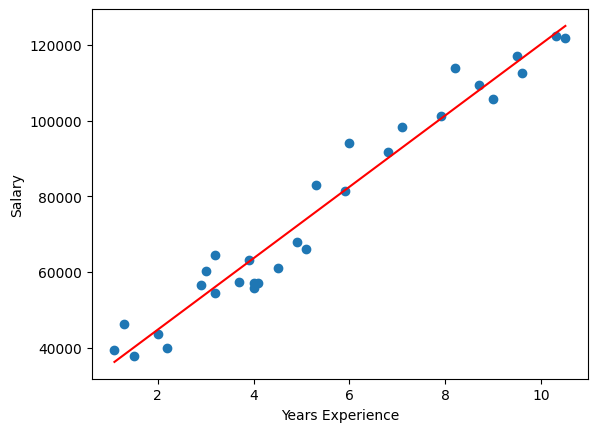

In [54]:
plt.scatter(x_train,y_train, label='Data Points')

x_vals = np.linspace(min(x_train), max(x_train), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("Years Experience")
plt.ylabel("Salary")